In [1]:
import jax
import jax.numpy as jnp 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import Transformer
sns.set_style("darkgrid")

In [2]:
transformer = Transformer(input_vocab=50, output_vocab=50, model_dim=4, feedforward_dim=4, num_attention_layer=2)

Try using the transformer with None mask

In [3]:
input_sample = jnp.arange(12).reshape((2,6))
output_sample = jnp.arange(20).reshape((2,10))

params = transformer.init(jax.random.key(0), input_sample, output_sample, None, None)
transformer.apply(params, input_sample, output_sample, None, None)

Array([[[-3.8832495, -3.8901052, -4.5473022, -3.3150616, -4.1841774,
         -3.3173535, -3.5916152, -3.425694 , -3.5433424, -3.6411397,
         -4.419108 , -4.0352864, -3.9471729, -3.644084 , -4.1842794,
         -3.8847198, -3.6716638, -3.988468 , -3.2260635, -4.7781005,
         -3.9860168, -3.419336 , -4.2225084, -3.8155484, -4.05883  ,
         -4.187437 , -3.7259958, -3.926604 , -4.346515 , -4.0264416,
         -3.3493423, -3.5354848, -3.8939052, -4.6259193, -4.0513253,
         -3.8388686, -4.1063695, -3.791463 , -4.8296776, -4.288242 ,
         -4.4788814, -3.427287 , -3.864437 , -4.816655 , -4.5829306,
         -3.7327209, -4.505471 , -4.4341917, -4.4594965, -4.4525957],
        [-3.8197222, -3.8650627, -4.3797336, -3.3109365, -4.1791143,
         -3.291697 , -3.6425798, -3.540963 , -3.5193071, -3.6154962,
         -4.3395376, -4.0163455, -3.8712392, -3.7369072, -4.2373314,
         -4.0140367, -3.6413217, -3.9695039, -3.192668 , -4.771016 ,
         -3.9847758, -3.3524504, 

Try using the transformer with real mask

In [4]:
key = jax.random.key(0)
input_sample = jnp.arange(12).reshape((2,6))
output_sample = jnp.arange(20).reshape((2,10))
input_mask_sample = jax.random.randint(key=key, minval=0, maxval=2, shape=(2,1,6))
output_mask_sample = jax.random.randint(key=key, minval=0, maxval=2, shape=(2, 10, 10))

params = transformer.init(key, input_sample, output_sample, input_mask_sample, output_mask_sample)
transformer.apply(params, input_sample, output_sample, input_mask_sample, output_mask_sample)

Array([[[-3.8681345, -3.8867238, -4.5078106, -3.3131077, -4.1885414,
         -3.3069658, -3.615243 , -3.4587855, -3.5315855, -3.6341102,
         -4.395129 , -4.0283937, -3.9296474, -3.6698895, -4.2085867,
         -3.9100146, -3.6688344, -3.9706228, -3.215465 , -4.785014 ,
         -3.989969 , -3.4028466, -4.2136397, -3.8036103, -4.028261 ,
         -4.169676 , -3.7239065, -3.9255867, -4.342814 , -4.036146 ,
         -3.3552654, -3.5220747, -3.919909 , -4.6540008, -4.0644474,
         -3.853701 , -4.1130333, -3.7568493, -4.843481 , -4.287256 ,
         -4.47244  , -3.4534829, -3.878792 , -4.8165627, -4.579174 ,
         -3.721247 , -4.5071354, -4.434435 , -4.4511824, -4.486019 ],
        [-3.8088722, -3.8686514, -4.3417664, -3.3159966, -4.191152 ,
         -3.2833307, -3.6896515, -3.585733 , -3.5032883, -3.612366 ,
         -4.3043385, -4.0051017, -3.8588016, -3.7690854, -4.277499 ,
         -4.0236945, -3.6519806, -3.9278   , -3.1886106, -4.7833667,
         -3.996279 , -3.3455377, 

## Training and testing transformer 
We'll try to create a transformer which is able to copy tasks perfectly

In [5]:
from transformer_train import create_train_state, train_model, Batch

In [6]:
transformer = Transformer(input_vocab=10, output_vocab=10, model_dim=128, feedforward_dim=512, num_attention_layer=8)

In [7]:
state = create_train_state(model=transformer, learning_rate=1e-3, key=jax.random.key(0))

In [8]:
def copy_data_generator(num_batches=20, batch_size=10, input_size=10):
    for _ in range(num_batches):
        data = np.random.randint(10, size=(batch_size, input_size))
        data = jnp.array(data)
        batch = Batch(data, data, 0)
        yield batch

In [9]:
trained_state, copy_loss = train_model(state, data_generator=copy_data_generator, num_epoch=50)

Epoch: 0, Loss: 2.7897567749023438
Epoch: 1, Loss: 2.2636466026306152
Epoch: 2, Loss: 2.1018075942993164
Epoch: 3, Loss: 1.9547252655029297
Epoch: 4, Loss: 1.84832763671875
Epoch: 5, Loss: 1.8025197982788086
Epoch: 6, Loss: 1.7966562509536743
Epoch: 7, Loss: 1.749093770980835
Epoch: 8, Loss: 1.7332347631454468
Epoch: 9, Loss: 1.6852573156356812
Epoch: 10, Loss: 1.5928415060043335
Epoch: 11, Loss: 1.4259779453277588
Epoch: 12, Loss: 1.3134304285049438
Epoch: 13, Loss: 1.279769778251648
Epoch: 14, Loss: 1.2696952819824219
Epoch: 15, Loss: 1.1348462104797363
Epoch: 16, Loss: 1.0798736810684204
Epoch: 17, Loss: 0.9871540069580078
Epoch: 18, Loss: 0.9484955072402954
Epoch: 19, Loss: 0.8684821128845215
Epoch: 20, Loss: 0.8957663774490356
Epoch: 21, Loss: 0.8105753660202026
Epoch: 22, Loss: 0.6771900653839111
Epoch: 23, Loss: 0.7301346063613892
Epoch: 24, Loss: 0.6795486807823181
Epoch: 25, Loss: 0.5694952011108398
Epoch: 26, Loss: 0.6577728986740112
Epoch: 27, Loss: 0.5788687467575073
Epoch:

In [10]:
copy_loss = list(map(lambda x: x.item(), copy_loss))

Text(0.5, 1.0, 'Loss vs Epoch Number (Copy task)')

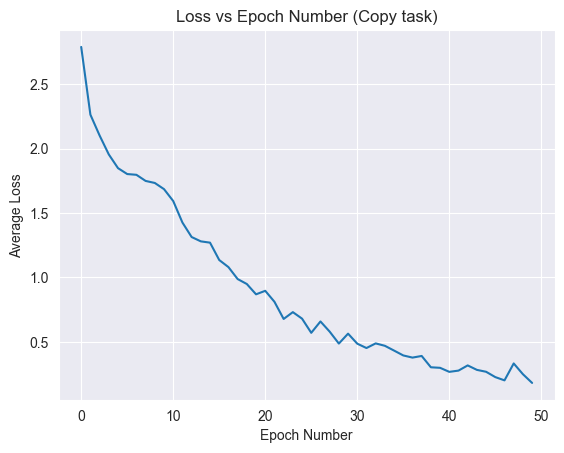

In [11]:
sns.lineplot(copy_loss)
plt.xlabel("Epoch Number")
plt.ylabel("Average Loss")
plt.title("Loss vs Epoch Number (Copy task)")

In [12]:
params = trained_state.params 

We'll now try to run this transformer

In [13]:
from transformer_train import decode

input = jax.random.randint(key=jax.random.key(0), shape=(30,10), minval=0, maxval=9)
output_init = input[:, 0].reshape(-1, 1)
input_mask = jnp.ones((1,1,10), dtype=int)

In [14]:
pred = decode(trained_state, input, output_init, 10, input_mask)

In [15]:
(input == pred).mean()

Array(0.86, dtype=float32)

### Sequence Reversal

We will try to train a transformer to reverse sequences

In [16]:
def reverse_data_generator(num_batches=20, batch_size=10, input_size=10):
    for _ in range(num_batches):
        data = np.random.randint(10, size=(batch_size, input_size))
        data = jnp.array(data)
        reverse_data = jnp.flip(data, axis=1)
        batch = Batch(data, reverse_data, 0)
        yield batch

In [17]:
reverse_transformer = Transformer(input_vocab=10, output_vocab=10, model_dim=128, feedforward_dim=512, num_attention_layer=8)

In [18]:
reverse_state = create_train_state(model=reverse_transformer, learning_rate=1e-3, key=jax.random.key(0))

In [19]:
reverse_trained_state, reverse_loss = train_model(reverse_state, data_generator=reverse_data_generator, num_epoch=50)

Epoch: 0, Loss: 2.7360429763793945
Epoch: 1, Loss: 2.2000725269317627
Epoch: 2, Loss: 2.02640438079834
Epoch: 3, Loss: 1.8821121454238892
Epoch: 4, Loss: 1.8351653814315796
Epoch: 5, Loss: 1.8129494190216064
Epoch: 6, Loss: 1.784724473953247
Epoch: 7, Loss: 1.724805235862732
Epoch: 8, Loss: 1.6709368228912354
Epoch: 9, Loss: 1.6945902109146118
Epoch: 10, Loss: 1.511947512626648
Epoch: 11, Loss: 1.3756263256072998
Epoch: 12, Loss: 1.3078850507736206
Epoch: 13, Loss: 1.2308716773986816
Epoch: 14, Loss: 1.1288357973098755
Epoch: 15, Loss: 1.084335446357727
Epoch: 16, Loss: 0.9800921678543091
Epoch: 17, Loss: 0.8606530427932739
Epoch: 18, Loss: 0.923538327217102
Epoch: 19, Loss: 0.806574821472168
Epoch: 20, Loss: 0.7784059643745422
Epoch: 21, Loss: 0.7036315202713013
Epoch: 22, Loss: 0.7124412655830383
Epoch: 23, Loss: 0.6497047543525696
Epoch: 24, Loss: 0.6002734899520874
Epoch: 25, Loss: 0.6414151191711426
Epoch: 26, Loss: 0.6103410720825195
Epoch: 27, Loss: 0.4543999135494232
Epoch: 28,

In [20]:
reverse_loss = list(map(lambda x: x.item(), reverse_loss))

Text(0.5, 1.0, 'Loss vs Epoch Number (Sequence reversal task)')

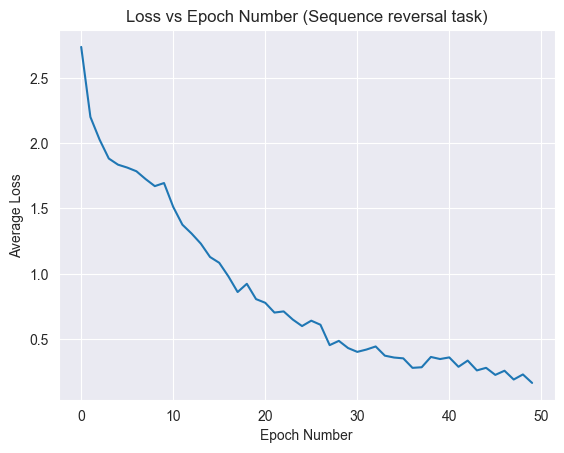

In [21]:
sns.lineplot(reverse_loss)
plt.xlabel("Epoch Number")
plt.ylabel("Average Loss")
plt.title("Loss vs Epoch Number (Sequence reversal task)")

In [22]:
from transformer_train import decode

input = jax.random.randint(key=jax.random.key(0), shape=(30,10), minval=0, maxval=9)
output_init = input[:, -1].reshape(-1, 1)
input_mask = jnp.ones((1,1,10), dtype=int)

In [23]:
pred = decode(reverse_trained_state, input, output_init, 10, input_mask)

In [24]:
(pred == jnp.flip(input, axis=1)).mean()

Array(0.78000003, dtype=float32)

## Sorting Numbers
We will try to train a transformer to sort numbers.

In [30]:
def sort_data_generator(num_batches=20, batch_size=10, input_size=10):
    for _ in range(num_batches):
        data = np.random.randint(10, size=(batch_size, input_size))
        data = jnp.array(data)
        sorted_data = jnp.sort(data, axis=1)
        batch = Batch(data, sorted_data, 0)
        yield batch

In [31]:
sort_transformer = Transformer(input_vocab=10, output_vocab=10, model_dim=128, feedforward_dim=512, num_attention_layer=8)

In [32]:
sort_state = create_train_state(model=sort_transformer, learning_rate=1e-3, key=jax.random.key(0))

In [33]:
sort_trained_state, sort_loss = train_model(sort_state, data_generator=sort_data_generator, num_epoch=50)

Epoch: 0, Loss: 2.189063549041748
Epoch: 1, Loss: 1.0314967632293701
Epoch: 2, Loss: 0.7320489883422852
Epoch: 3, Loss: 0.5814937949180603
Epoch: 4, Loss: 0.547069787979126
Epoch: 5, Loss: 0.5012800693511963
Epoch: 6, Loss: 0.4544120728969574
Epoch: 7, Loss: 0.4575572907924652
Epoch: 8, Loss: 0.42817288637161255
Epoch: 9, Loss: 0.4671246409416199
Epoch: 10, Loss: 0.3860047459602356
Epoch: 11, Loss: 0.3675386309623718
Epoch: 12, Loss: 0.3266274034976959
Epoch: 13, Loss: 0.2790426015853882
Epoch: 14, Loss: 0.33013930916786194
Epoch: 15, Loss: 0.3074609637260437
Epoch: 16, Loss: 0.2923043370246887
Epoch: 17, Loss: 0.2650713622570038
Epoch: 18, Loss: 0.25532853603363037
Epoch: 19, Loss: 0.19866174459457397
Epoch: 20, Loss: 0.17311981320381165
Epoch: 21, Loss: 0.17336080968379974
Epoch: 22, Loss: 0.27326783537864685
Epoch: 23, Loss: 0.23498263955116272
Epoch: 24, Loss: 0.1648644506931305
Epoch: 25, Loss: 0.18898741900920868
Epoch: 26, Loss: 0.13088969886302948
Epoch: 27, Loss: 0.18848612904

In [34]:
from transformer_train import decode

input = jax.random.randint(key=jax.random.key(0), shape=(30,10), minval=0, maxval=9)
output_init = jnp.min(input, axis=1).reshape(-1, 1)
input_mask = jnp.ones((1,1,10), dtype=int)

In [35]:
pred = decode(sort_trained_state, input, output_init, 10, input_mask)

In [36]:
(pred == jnp.sort(input, axis=1)).mean()

Array(0.38, dtype=float32)